In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from sklearn.manifold import TSNE
from functions import gaussian, euclidean_distance, gaussian_second_derivative
from network import Network

#os.chdir('..')

## Przydatne funkcje

In [2]:
def cluster(kohonen_network, data):
    classes = list(data['c'].unique())
    colnames = copy.deepcopy(classes)
    colnames.append('x')
    colnames.append('y')
    clusters = pd.DataFrame(columns=colnames)

    shape = kohonen_network.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            row = {'x': i, 'y': j}
            for c in classes:
                row[c] = 0
            row = pd.DataFrame(row, index=[0])
            clusters = pd.concat([clusters, row], ignore_index=True, axis=0)
    for i in range(len(data)):
        x = np.array(data.iloc[i, :2])
        x_class = data.loc[i, 'c']
        i_min, j_min = kohonen_network._find_BMU(x)
        clusters.loc[(clusters['x'] == i_min ) & (clusters['y'] == j_min), x_class] += 1
    return clusters

def visualise_2D(clusters):
    n = len(clusters.columns) - 2
    plt.figure(figsize=[8, 8])
    colors = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']
    for i in range(n):
        plt.scatter(x=clusters.x, y=clusters.y, alpha=0.4, s=100*clusters[i].astype('float'), c=colors[i])
    #plt.legend(np.arange(n))
    plt.show()


## 1. Zbiór danych z sześciokątami

In [3]:
hexagon_data = pd.read_csv('data\\hexagon.csv')
x = np.array(hexagon_data.x)
y = np.array(hexagon_data.y)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
hex_xy = np.concatenate((x, y), axis=1)
c = np.array(hexagon_data.c)

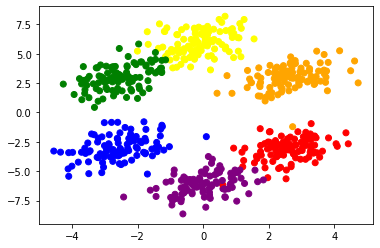

In [21]:
COLORS = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']
colors = [COLORS[idx] for idx in c]
plt.scatter(x, y, c=colors)
plt.show()

### 1.2. Trenowanie różnych sieci

#### 1.2.1. 
1. Sieć o wymiarach 12 x 12.
2. Skala sąsiedztwa ustawiona na 1.
3. Trenowana przez 300 epok.
4. Funkcja sąsiedztwa: gaussowska.

In [4]:
KN_hex = Network(input_shape=2, shape=(12, 12))
KN_hex.fit(hex_xy, 300, neighbourhood_scale=1)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

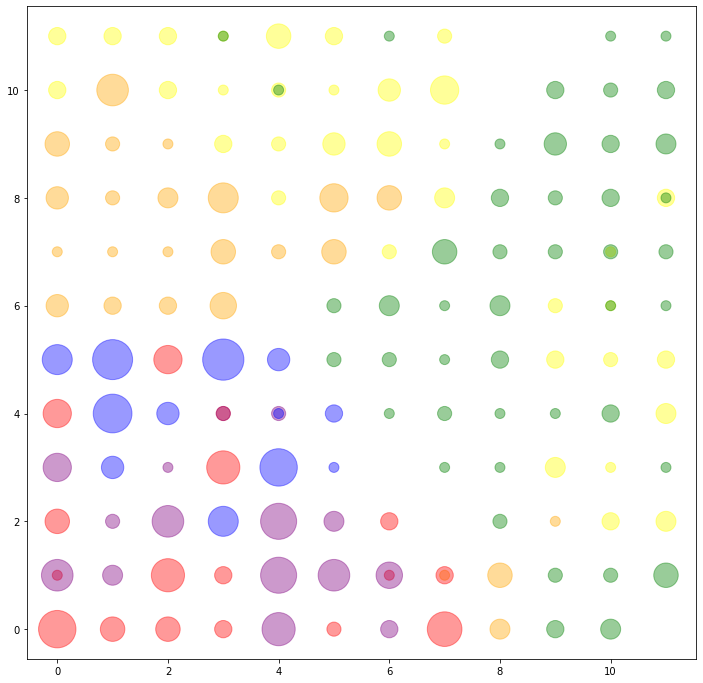

In [9]:
KN_hex_clusters = cluster(KN_hex, hexagon_data)
visualise_2D(KN_hex_clusters)

In [15]:
KN_hex.fit(hex_xy, 200, neighbourhood_scale=1)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

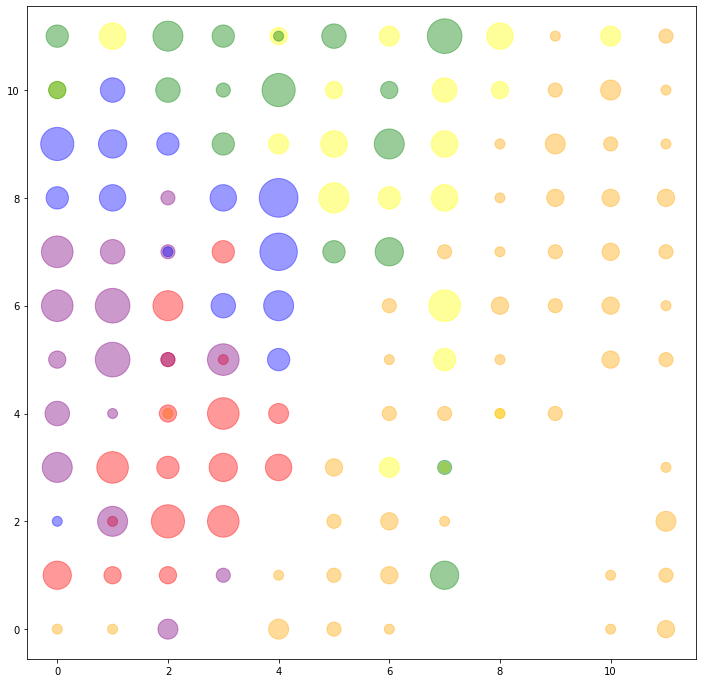

In [17]:
KN_hex_clusters12 = cluster(KN_hex, hexagon_data)
visualise_2D(KN_hex_clusters12)

#### 1.2.2. 
1. Sieć o wymiarach 12 x 12.
2. Skala sąsiedztwa ustawiona na 1.
3. Trenowana przez 300 epok.
4. Funkcja sąsiedztwa: gaussowska druga pochodna.

In [6]:
KN_hex2 = Network(input_shape=2, shape=(12, 12), neighbourhood_func=gaussian_second_derivative)
KN_hex2.fit(hex_xy, 100, neighbourhood_scale=1, learning_rate=0.000001)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

In [7]:
KN_hex2.weights

array([[[-3.25758253e-01, -5.23276324e-01],
        [ 6.03255033e-01,  3.65430547e-01],
        [ 1.62913391e-01, -3.26969824e-01],
        [ 7.99446046e-01, -6.65613225e-01],
        [-4.45641780e-01, -6.16931430e-01],
        [-3.05336667e-01,  8.32382555e-01],
        [-2.65495940e-02,  6.14840046e+00],
        [-4.25453617e-01, -2.10189595e-01],
        [ 1.26491982e-01, -3.19169936e-01],
        [-8.71669238e-01, -9.02382603e-02],
        [ 5.45920840e-01,  4.52618096e-01],
        [-5.03257697e-01, -3.84639630e-01]],

       [[-7.60255020e-01,  4.27739895e-01],
        [ 3.69960332e-01, -4.96862734e-01],
        [-6.17364285e-01, -7.48433585e-02],
        [ 6.27734855e-01,  2.91228832e-01],
        [ 1.60024169e-01, -1.59981332e-01],
        [-2.01972615e-01, -2.08264007e-01],
        [-5.74077079e-01, -3.90090845e-01],
        [ 6.99794252e-01,  5.16215049e-01],
        [-8.95523391e-01, -3.16756278e-01],
        [-7.56238864e-01,  1.62350494e-01],
        [-8.40358880e-01, -2.8

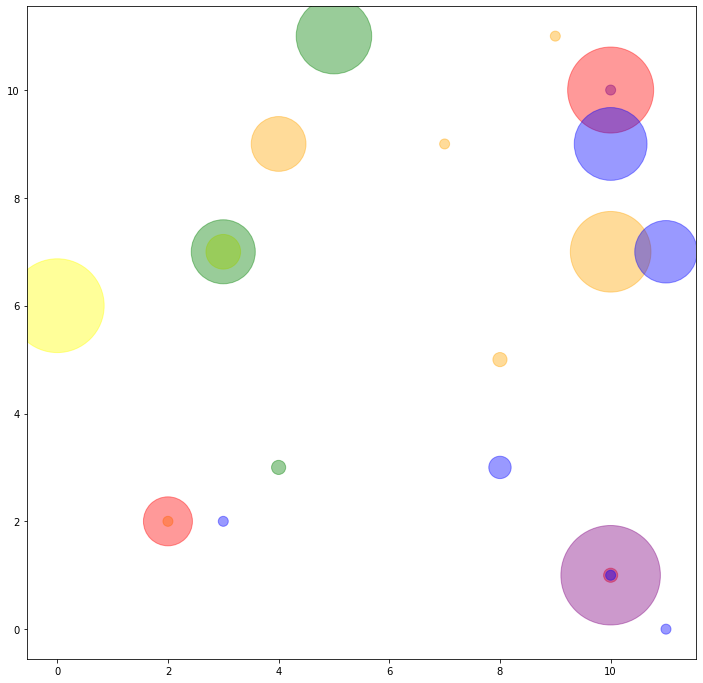

In [8]:
KN_hex_clusters2 = cluster(KN_hex2, hexagon_data)
visualise_2D(KN_hex_clusters2)

In [12]:
KN_hex4 = Network(input_shape=2, shape=(12, 12), neighbourhood_func=gaussian_second_derivative)
KN_hex4.fit(hex_xy, 50, neighbourhood_scale=0.5, learning_rate=0.00001)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49


In [22]:
KN_hex4.fit(hex_xy, 100, neighbourhood_scale=1, learning_rate=0.00001)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

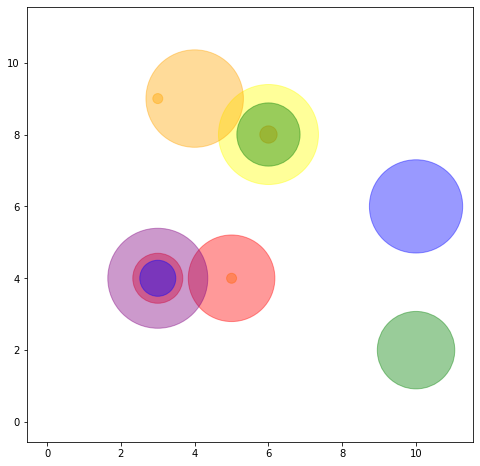

In [14]:
KN_hex_clusters4 = cluster(KN_hex4, hexagon_data)
visualise_2D(KN_hex_clusters4)

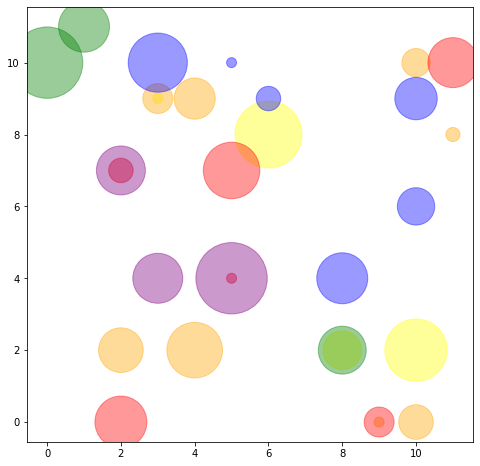

In [16]:
KN_hex_clusters4 = cluster(KN_hex4, hexagon_data)
visualise_2D(KN_hex_clusters4)

-0.04142107082952042

In [5]:
KN_hex3 = Network(input_shape=2, shape=(12, 12), neighbourhood_func=gaussian_second_derivative)
KN_hex3.load_weights('weights/KN_12x12_lr=1e-06_e=101_gaussian_second_derivative.npy')

In [7]:
KN_hex3.weights

array([[[ 8.01217185e-01, -5.89210573e-02],
        [-2.35555975e-01, -5.84605502e-01],
        [ 2.09910283e-01,  7.88252854e-01],
        [-3.57528619e-01, -4.42350722e-01],
        [ 4.90680521e-01, -3.38949033e-01],
        [ 8.69641684e-01, -6.68910422e-01],
        [-4.90388010e-01,  6.48880754e-01],
        [ 3.07175112e-02, -6.80456406e-02],
        [ 2.80228862e-01, -7.22905998e-01],
        [ 9.44307671e-01,  6.72877951e-02],
        [-7.60871841e-01,  2.05366740e-01],
        [-5.10259810e-01,  4.93775955e-01]],

       [[ 2.19873946e-01, -5.13074573e-01],
        [ 3.65567849e-01, -6.66666472e-01],
        [-8.35459130e-01, -3.61881279e-01],
        [-4.76553179e-01,  8.93636098e-01],
        [-4.02306694e-01, -3.04977366e-01],
        [ 1.34808229e+00,  1.50682258e+00],
        [-4.81020244e-02, -9.12211338e-01],
        [ 8.21910797e-01,  7.56808063e-02],
        [-7.35105814e-02, -5.51702205e-01],
        [-6.87202758e-01,  8.02187488e-01],
        [-4.33086554e-01, -4.9

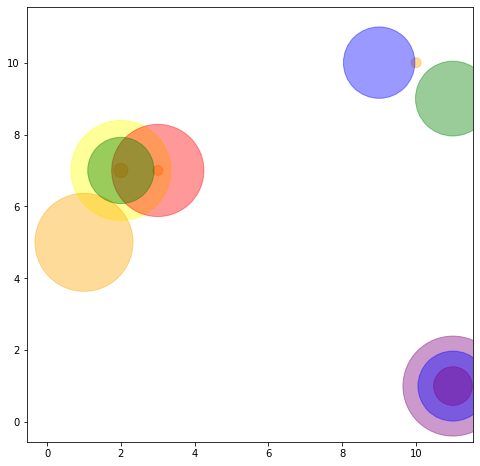

In [6]:
KN_hex_clusters3 = cluster(KN_hex3, hexagon_data)
visualise_2D(KN_hex_clusters3)

In [27]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(KN_hex4.weights)
X_embedded.shape

ValueError: Found array with dim 3. Estimator expected <= 2.

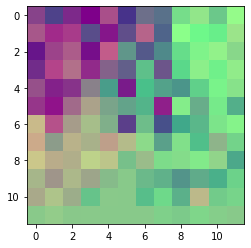

In [5]:
to_plot = np.concatenate((KN2.weights, np.zeros((12, 12, 1)) + 0.5), axis=2)
image = (to_plot - np.min(to_plot)) / (np.max(to_plot) - np.min(to_plot)) * 255
plt.imshow(image.astype('int'))

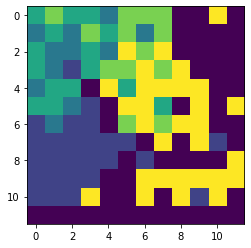

In [9]:
clusters2 = KN2.cluster(hexagon_data)
visualise(clusters2)

In [52]:
cls = cluster(KN2, hexagon_data)

[1, 0, 2, 4, 3, 5]
   x  y  1  0  2  4  3  5
0  0  0  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  1  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  2  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  3  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  4  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  5  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  6  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  7  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  8  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  0  9  0  0  0  0  0  0
   x   y  1  0  2  4  3  5
0  0  10  0  0  0  0  0  0
   x   y  1  0  2  4  3  5
0  0  11  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  0  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  1  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  2  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  3  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  4  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  5  0  0  0  0  0  0
   x  y  1  0  2  4  3  5
0  1  6  0  0  

In [53]:
cls

,1,0,2,4,3,5,x,y
0,0,0,0,0,4,0,0,0
1,0,0,0,7,0,0,0,1
2,0,0,0,0,13,0,0,2
3,0,0,0,0,2,0,0,3
4,0,0,14,0,0,0,0,4
...,...,...,...,...,...,...,...,...
139,0,3,0,0,0,0,11,7
140,0,4,0,0,0,0,11,8
141,0,5,0,0,0,0,11,9
142,0,2,0,0,0,0,11,10


In [4]:
KN = Network(input_shape=2, shape=(20, 20))

In [5]:
KN.fit(hex_xy, 100)

Epoch no. 0
Epoch no. 1
Epoch no. 2
Epoch no. 3
Epoch no. 4
Epoch no. 5
Epoch no. 6
Epoch no. 7
Epoch no. 8
Epoch no. 9
Epoch no. 10
Epoch no. 11
Epoch no. 12
Epoch no. 13
Epoch no. 14
Epoch no. 15
Epoch no. 16
Epoch no. 17
Epoch no. 18
Epoch no. 19
Epoch no. 20
Epoch no. 21
Epoch no. 22
Epoch no. 23
Epoch no. 24
Epoch no. 25
Epoch no. 26
Epoch no. 27
Epoch no. 28
Epoch no. 29
Epoch no. 30
Epoch no. 31
Epoch no. 32
Epoch no. 33
Epoch no. 34
Epoch no. 35
Epoch no. 36
Epoch no. 37
Epoch no. 38
Epoch no. 39
Epoch no. 40
Epoch no. 41
Epoch no. 42
Epoch no. 43
Epoch no. 44
Epoch no. 45
Epoch no. 46
Epoch no. 47
Epoch no. 48
Epoch no. 49
Epoch no. 50
Epoch no. 51
Epoch no. 52
Epoch no. 53
Epoch no. 54
Epoch no. 55
Epoch no. 56
Epoch no. 57
Epoch no. 58
Epoch no. 59
Epoch no. 60
Epoch no. 61
Epoch no. 62
Epoch no. 63
Epoch no. 64
Epoch no. 65
Epoch no. 66
Epoch no. 67
Epoch no. 68
Epoch no. 69
Epoch no. 70
Epoch no. 71
Epoch no. 72
Epoch no. 73
Epoch no. 74
Epoch no. 75
Epoch no. 76
Epoch no.

In [6]:
clusters = KN.cluster(hexagon_data)

In [7]:
clusters

array([[1, 4, 2],
       [0, 1, 2],
       [2, 6, 3],
       ...,
       [4, 1, 7],
       [1, 5, 0],
       [3, 4, 9]], dtype=int64)

In [7]:
to_plot = np.concatenate((KN.weights, np.zeros((20, 20, 1))), axis=2)
image = (to_plot - np.min(to_plot)) / (np.max(to_plot) - np.min(to_plot)) * 255

## 3D data

In [ ]:
cube_data = pd.read_csv('data\\cube.csv')
x = np.array(cube_data.x)
y = np.array(cube_data.y)
z = np.array(cube_data.z)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
z = np.reshape(z, (-1, 1))
cube = np.concatenate((x, y, z), axis=1)